<a href="https://colab.research.google.com/github/AmrutaMenon/Customer-Churn-Analysis-prediction/blob/main/Telecom_Customer_Churn_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Customer Churn Analysis and Prediction**


---





## **Introduction**

### What is Customer Churn?

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.
Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.
Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers’ loyalty. The core to succeed in this market lies in the customer itself.
Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

## **Context**
Predict the whether a customer churn or not by analyzing the behavior of different customers.

## **Data Source**
The dataset was collected from Kaggle named as Telco Customer Churn dataset. It was an IBM issued dataset.
Link: https://www.kaggle.com/blastchar/telco-customer-churn

## **Content** 
Each row in the dataset represents a customer, while each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features). The data set includes information about:  Customers who left within the last month – the column is called Churn  Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies  Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges  Demographic info about customers – gender, age range, and if they have partners and dependents

**Columns:** 

* CustomerID: Customer ID unique for each customer.

* gender: Whether the customer is a male or a female .

* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).

* Partner: Whether the customer has a partner or not (Yes, No).

* Dependent: Whether the customer has dependents or not (Yes, No). 

* PhoneService: Whether the customer has a phone service or not (Yes, No). 

* MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service).

* InternetService: Customer’s internet service provider (DSL, Fiber optic, No). 

* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service). 

* OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service. 

* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service). 

* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service). 

* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service). 

* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service). 

* Contract: The contract term of the customer (Month-to-month, One year, Two years). 

* PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years). 

* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)). 

* Tenure: Number of months the customer has stayed with the company. 

* MonthlyCharges: The amount charged to the customer monthly. 

* TotalCharges: The total amount charged to the customer. 

* Churn: Whether the customer churned or not (Yes or No).

## **Importing packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Dataset**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Customer Churn Analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Data Pre-Processing**

In [3]:
# to display the shape of the dataframe
df.shape

(7043, 21)

In [4]:
# to view each column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# get a summary about each columns, their datatypes and the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# get the statistical informations on numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#looping through columns to get the unique values of each column
for i in df.columns:
  print(f"Unique {i}'s count: {df[i].nunique()}")
  print(f"{df[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

In [8]:
# changing the datatype of Total charges and Tenure to float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

df['tenure']=df['tenure'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# to view null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## **Data Cleaning**

* The dataset is found to have 11 missing values in the column named TotalCharges.

* The missing values are filled by the mean value of TotalCharges.



In [11]:
# Filling my the mean of TotalCharges
df.fillna(df["TotalCharges"].mean(),inplace=True)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now the data contains no missing values and the shape of the data remains unchanged.

In [13]:
df.shape

(7043, 21)

## **Exploratory Data Analysis**

### Visualizing the target variable i.e, Churn

In [14]:
# to the the counts of unique values
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

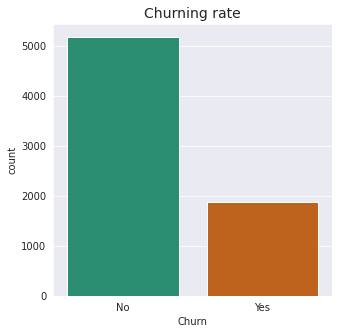

In [15]:
# plotting bar graph to visualize
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.countplot(x='Churn',data=df,palette='Dark2')
plt.title('Churning rate',fontsize=14)
plt.show()

###Insights:

By visualizing the target variable, it is evident that the dataset contains class imbalance.

### Analyzing the three continuous variables with respect to Churn

There are three continuous variables in the dataset: Tenure, Monthly Charges and Total Charges. A boxplot is used to visualize the effect of all three upon churning.

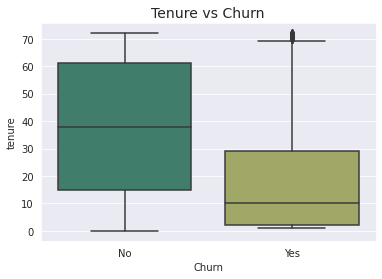

In [16]:
# Creating a function to plot all three continuous variables

def box(feature,y_axis,color):
  sns.boxplot(x='Churn',y=y_axis ,data=df, palette=color)
  plt.title(f'{feature} vs Churn',fontsize=14)
  plt.show()

# Tenure vs Churn
box('Tenure','tenure','gist_earth')

### Insights:

The median tenure for customers who left the company is around 10 months.

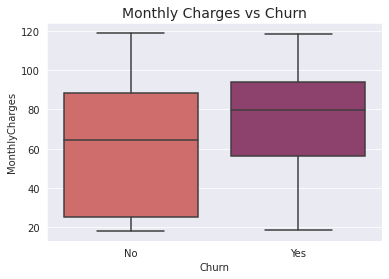

In [17]:
# Monthly charges vs Churn
box('Monthly Charges','MonthlyCharges','flare')

### Insights:

The median of the  monthly charges of the customers churned is above 75 i.e, the customers who have churned have high monthly charges.

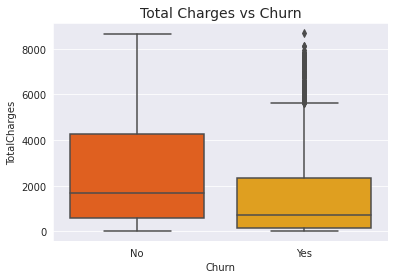

In [18]:
# Total charges vs Churn
box('Total Charges','TotalCharges','autumn')

###Insights:

*   The median value of Total charges of customers who have churned is low.
*   Outliers are detected among TotalCharges and tenure.







### What are the probability distributions of tenure, monthly charge and total charge

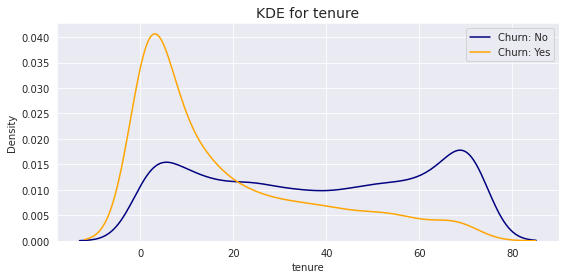

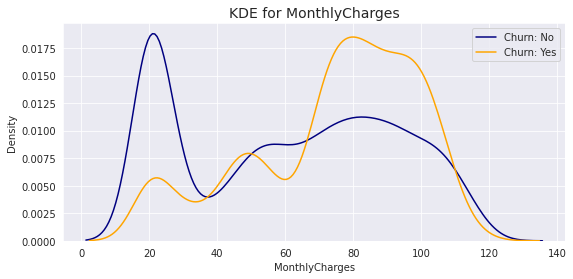

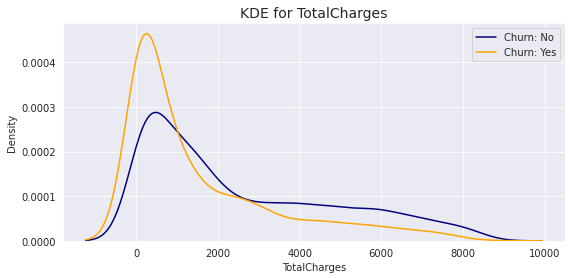

In [19]:
# creating a function to plot KDE plot for all three variables
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature),fontsize=14)
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
    plt.legend()
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

### Insights:
From the plots above we can conclude that:

*   Recent clients are more likely to churn.

*   Clients with higher MonthlyCharges are also more likely to churn.

*   Tenure and MonthlyCharges are probably important features.








### What is the effect of the TotalCharges upon the churn of a customer?

In [20]:
# Grouping variable Churn using the mean of TotalCharges
Churn_tot=df.groupby('Churn')['TotalCharges'].mean()
Churn_tot

Churn
No     2554.765772
Yes    1531.796094
Name: TotalCharges, dtype: float64

In [21]:
# creating them as a dataframe
Churn_tot=pd.DataFrame(Churn_tot).reset_index()
Churn_tot


,Churn,TotalCharges
0,No,2554.765772
1,Yes,1531.796094


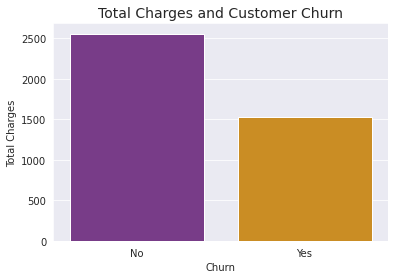

In [22]:
# plotting bar
sns.barplot(x='Churn',y='TotalCharges',data=Churn_tot,palette='CMRmap')
plt.title('Total Charges and Customer Churn',fontsize=14)
plt.ylabel('Total Charges')
plt.show()

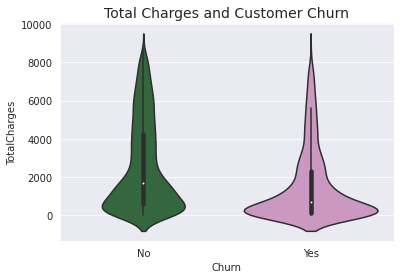

In [23]:
sns.violinplot(x='Churn',y='TotalCharges',data=df,palette='cubehelix')
plt.title('Total Charges and Customer Churn',fontsize=14)
plt.show()

### Insights:

* The margin of Total Charges between the customers who have churned and who remained is very less.

* So, Total Charges may also be a reason for the churning of customers.


### Relationship Between Monthly and TotalCharges

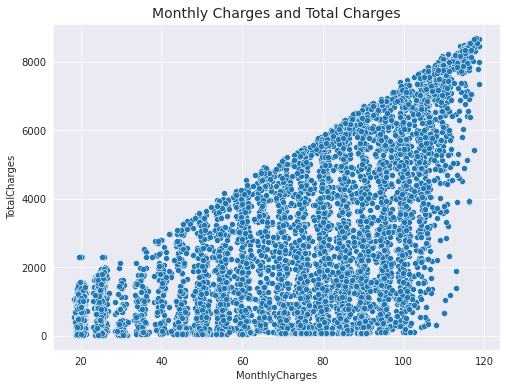

In [24]:
# visualize the relationship between MonthlyCharges and TotalCharges using scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df)
plt.title('Monthly Charges and Total Charges',fontsize=14)
plt.show()

### Insights:

* Monthly Charges and Total Charges has a positive correlation.
* We can see that the total charges increases as the monthly bill for a customer increases. So, Total Charges may also be a reason for the churning of customers.











### The majority of customers belong to which gender?

In [25]:
# finding the percentage of  male and female customers
cust_percent=df['gender'].value_counts()*100/len(df)
cust_percent=pd.DataFrame(cust_percent).reset_index()
cust_percent

,index,gender
0,Male,50.47565
1,Female,49.52435


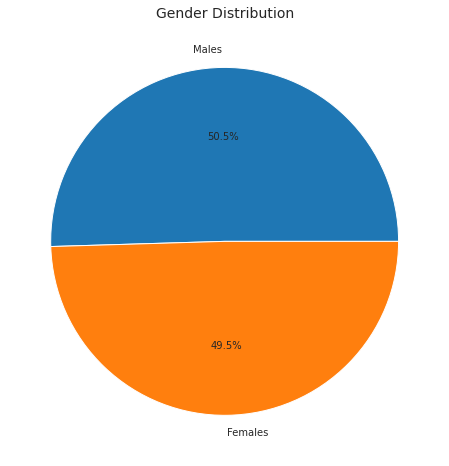

In [26]:
# visualizing using a pie chart
plt.figure(figsize=(12,8))
plt.pie(cust_percent.gender, labels=['Males','Females'],autopct='%1.1f%%',explode=None)
plt.title('Gender Distribution',fontsize=14)
plt.show()

### Insights:

About half of the customers in our data set are males while the other half are females.

### Which gender tends to churn more?

In [27]:
# percentage churn of gender
Gendr=df[['Churn','gender']].value_counts()*100/len(df)
Gendr

Churn  gender
No     Male      37.271049
       Female    36.191964
Yes    Female    13.332387
       Male      13.204600
dtype: float64

In [28]:
# creating dataframe
Gendr_churn=pd.DataFrame(Gendr).reset_index()
Gendr_churn.rename(columns={0:'Churning_Rate'},inplace=True)
Gendr_churn

,Churn,gender,Churning_Rate
0,No,Male,37.271049
1,No,Female,36.191964
2,Yes,Female,13.332387
3,Yes,Male,13.204600


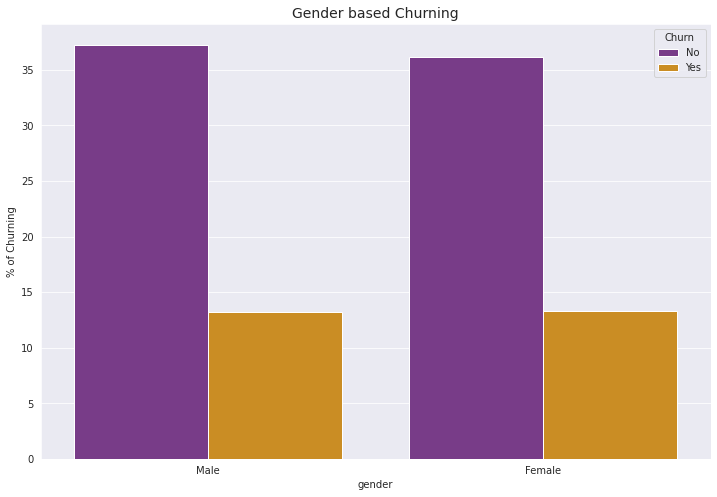

In [29]:
# visualizing using bar chart
plt.figure(figsize=(12,8))
sns.barplot(x='gender',y='Churning_Rate',hue='Churn',data=Gendr_churn,palette='CMRmap')
plt.title('Gender based Churning',fontsize=14)
plt.ylabel('% of Churning')
plt.show()

### Insights:

Churning rate of females and males somewhat the same.

### Age group of customers

In [30]:
# percentage of senior citizens
Seniors=df['SeniorCitizen'].value_counts()*100.0 /len(df)
Seniors=pd.DataFrame(Seniors).reset_index()
Seniors

,index,SeniorCitizen
0,0,83.785319
1,1,16.214681


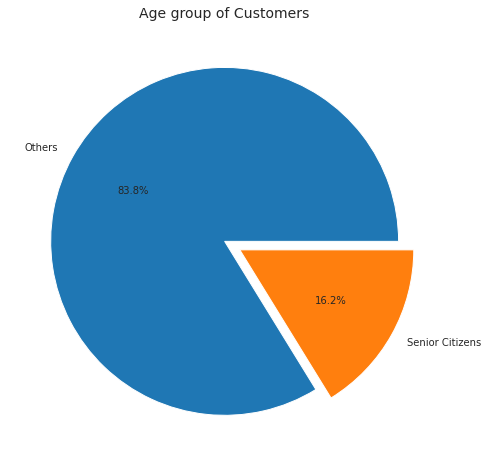

In [31]:
# visualizing them on a pie plot
plt.figure(figsize=(10,8))
plt.pie(Seniors.SeniorCitizen,labels=['Others','Senior Citizens'],autopct='%1.1f%%',explode=[0,0.1])
plt.title('Age group of Customers',fontsize=14)
plt.show()

### Insights:

There are only 16.2% of the customers who are senior citizens. Thus majority of the customers are younger people.

### What is status of senior citizens leaving the company?

In [32]:
# percentage churn of senior citizens
Seniors_churn=pd.DataFrame(df[['SeniorCitizen','Churn']].value_counts()*100/len(df)).reset_index().rename(columns={0:'Percentage'})
Seniors_churn

,SeniorCitizen,Churn,Percentage
0,0,No,64.006815
1,0,Yes,19.778503
2,1,No,9.456198
3,1,Yes,6.758484


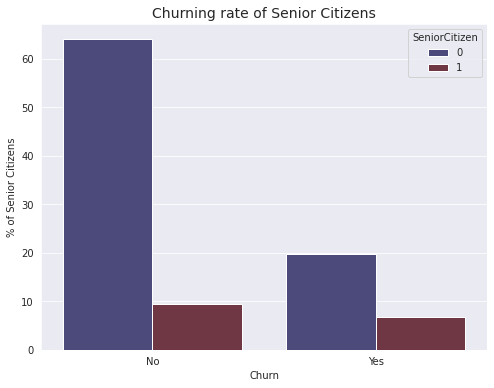

In [33]:
# visualizing using bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='Churn',y='Percentage',hue='SeniorCitizen',data=Seniors_churn,palette='icefire')
plt.title('Churning rate of Senior Citizens',fontsize=14)
plt.ylabel('% of Senior Citizens')
plt.show()

### Insights:

* The percentage of Senior Citizens leaving the company are very less compared to others.

* About 19.7% of Younger people left the company. So the people who left the company are mainly younger people.


### Which are the payment methods mostly preferred by the customers?

In [34]:
# unique values in payment method
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [35]:
# percentage of each payment methods
Pay=df.PaymentMethod.value_counts()*100/len(df)
Pay=pd.DataFrame(Pay).reset_index()
Pay

,index,PaymentMethod
0,Electronic check,33.579441
1,Mailed check,22.887974
2,Bank transfer (automatic),21.922476
3,Credit card (automatic),21.610109


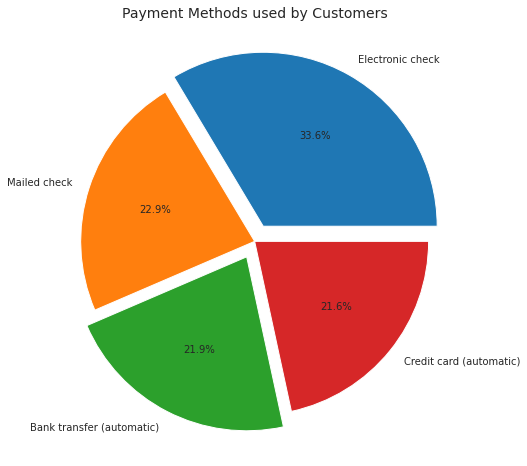

In [36]:
# visualizing using pie plot
plt.figure(figsize=(10,8))
plt.pie(Pay.PaymentMethod,labels=Pay['index'],autopct='%1.1f%%',explode=[0.1,0,0.1,0])
plt.title('Payment Methods used by Customers',fontsize=14)
plt.show()

### Insights:

Electronic Check is the most frequent payment method used followed by Mailed check, Bank transfer and Credit Card.

### Do customers with multiple lines churn faster?

In [37]:
# percentage of churn of customers with multiple lines
Multiplelines_churn=pd.DataFrame(df[['Churn','MultipleLines']].value_counts()*100/len(df)).reset_index()
Multiplelines_churn.rename(columns={0:'Percentage'},inplace=True)
Multiplelines_churn

,Churn,MultipleLines,Percentage
0,No,No,36.078376
1,No,Yes,30.115008
2,Yes,Yes,12.068721
3,Yes,No,12.054522
4,No,No phone service,7.269629
5,Yes,No phone service,2.413744


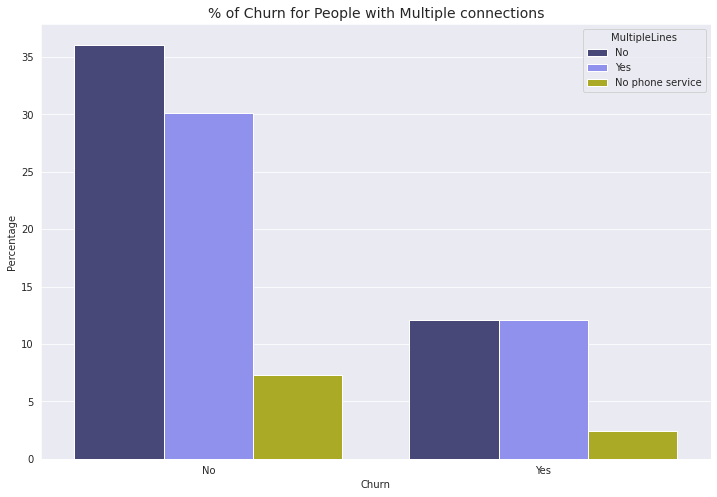

In [38]:
# visualizing using barplot
plt.figure(figsize=(12,8))
sns.barplot(x='Churn',y='Percentage',hue='MultipleLines',data=Multiplelines_churn,palette='gist_stern')
plt.title('% of Churn for People with Multiple connections',fontsize=14)
plt.show()

### Insights:

* Few customers don't have phone service.
* Customers with and without multiple lines have almost the same churn rate. So it cannot be analyzed as a factor of Churn.



### What is the percentage of churning of customers taking internet service?

In [39]:
# percentage churn of  customers with internet
Internet_churn=pd.DataFrame(df[['Churn','InternetService']].value_counts()*100/len(df)).reset_index()
Internet_churn.rename(columns={0:'Percentage'},inplace=True)
Internet_churn

,Churn,InternetService,Percentage
0,No,DSL,27.857447
1,No,Fiber optic,25.543092
2,No,No,20.062473
3,Yes,Fiber optic,18.415448
4,Yes,DSL,6.517109
5,Yes,No,1.604430


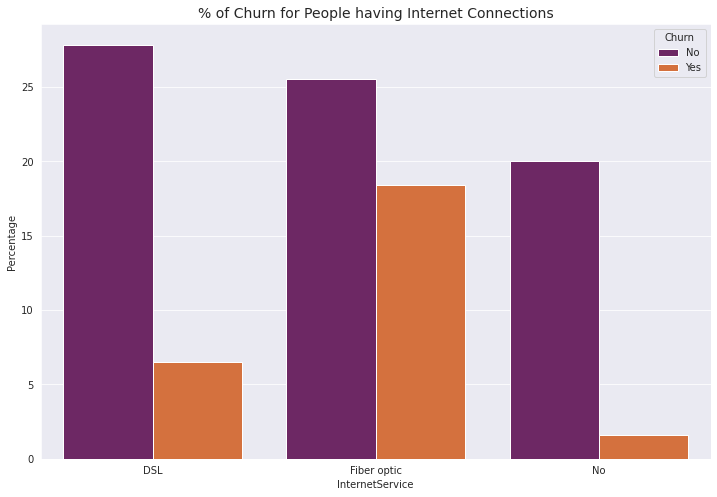

In [40]:
# visualizing using barplot
plt.figure(figsize=(12,8))
sns.barplot(x='InternetService',y='Percentage',hue='Churn',data=Internet_churn,palette='inferno')
plt.title('% of Churn for People having Internet Connections',fontsize=14)
plt.show()

### Insights:

* Clients without internet have a very low churn rate.
* Customers using Optic Fiber are more probable to churn than those with DSL connection.

### Does customers having partners and dependents are more likely to churn?

In [41]:
# churning rate of customers having partners
Partner_churn=pd.DataFrame(df[['Partner',"Churn"]].value_counts()/len(df)).reset_index().rename(columns={0:'Percentage'})
Partner_churn


,Partner,Churn,Percentage
0,Yes,No,0.388045
1,No,No,0.346585
2,No,Yes,0.170382
3,Yes,Yes,0.094988


In [42]:
# churning rate of customers having dependents
Dependent_churn=pd.DataFrame(df[['Dependents',"Churn"]].value_counts()/len(df)).reset_index().rename(columns={0:'Percentage'})
Dependent_churn

,Dependents,Churn,Percentage
0,No,No,0.481329
1,Yes,No,0.253301
2,No,Yes,0.219083
3,Yes,Yes,0.046287


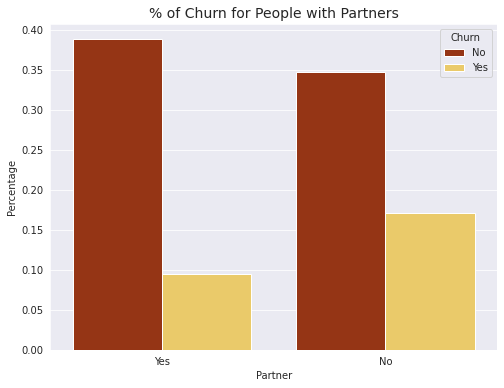

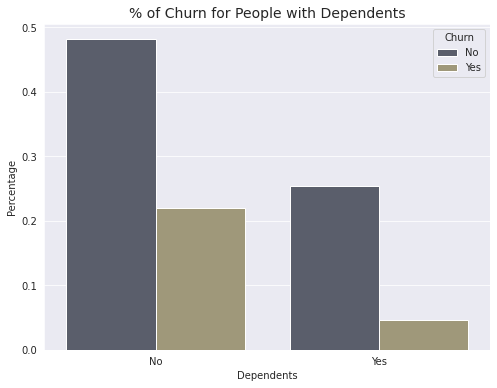

In [43]:
# visualizing for customers with partners
plt.figure(figsize=(8,6))
sns.barplot(x='Partner',y='Percentage',hue='Churn',data=Partner_churn,palette='afmhot')
plt.title('% of Churn for People with Partners',fontsize=14)
plt.show()

# visualizing for customers with dependents
plt.figure(figsize=(8,6))
sns.barplot(x='Dependents',y='Percentage',hue='Churn',data=Dependent_churn,palette='cividis')
plt.title('% of Churn for People with Dependents',fontsize=14)
plt.show()

### Insights:

* Customers having Partners are more likely to churn compared to the customers with Dependents.

### Does the customers using additional services such as online security, backup, device protection, techsupport, streaming tv , streaming movies etc. are more likely to churn?

In [44]:
# Unique values among additional services column
print(df['OnlineSecurity'].unique())
print(df['OnlineBackup'].unique())
print(df['DeviceProtection'].unique())
print(df['TechSupport'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingMovies'].unique())

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [45]:
# Count of all additinal charges
Additional_Charges=pd.DataFrame(df[['Churn','OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies']].value_counts()).reset_index().rename(columns={0:'Count'})
Additional_Charges


,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Count
0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1413
1,Yes,No,No,No,No,No,No,362
2,No,No,No,No,No,No,No,331
3,No,Yes,Yes,Yes,Yes,Yes,Yes,269
4,No,No,Yes,Yes,Yes,Yes,Yes,143
...,...,...,...,...,...,...,...,...
125,Yes,Yes,Yes,Yes,Yes,No,No,3
126,Yes,Yes,Yes,Yes,No,No,Yes,3
127,Yes,No,No,Yes,Yes,Yes,No,2
128,Yes,Yes,No,No,Yes,No,Yes,2


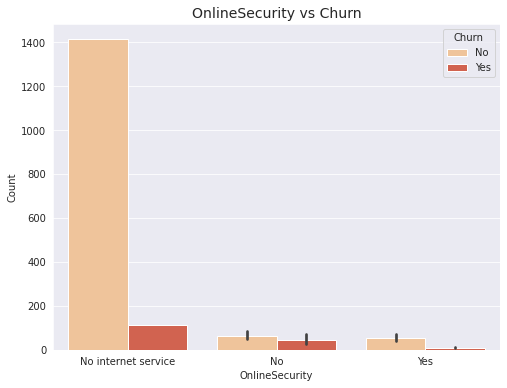

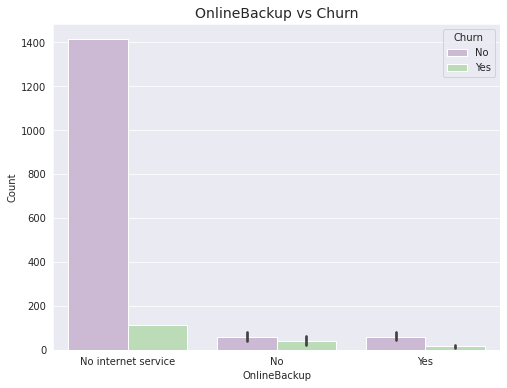

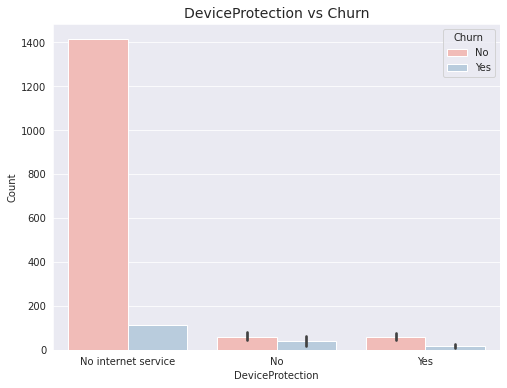

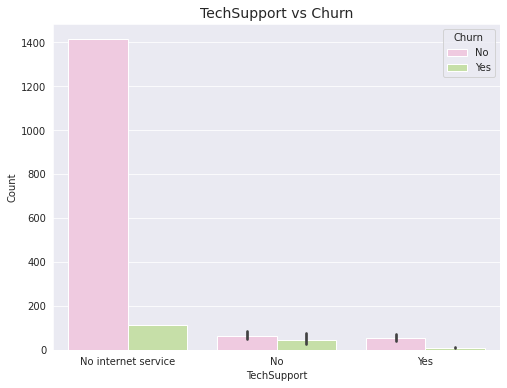

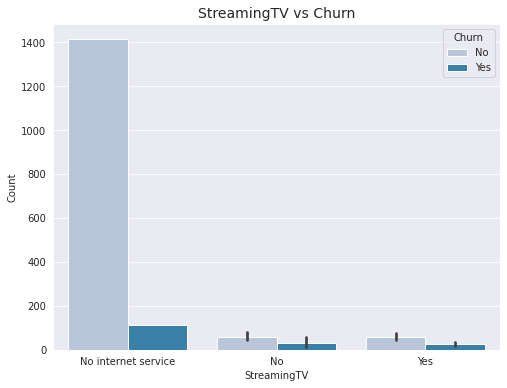

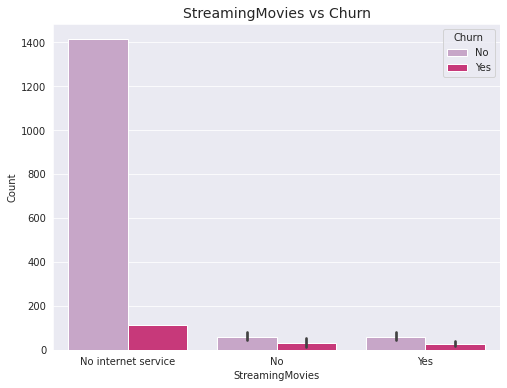

In [46]:
# defining a function to plot a bar chart for all the additional services
def bar(feature,colour):
  plt.figure(figsize=(8,6))
  sns.barplot(x=feature,y='Count',hue='Churn',data=Additional_Charges,palette=colour)
  plt.title(f'{feature} vs Churn',fontsize=14)
  plt.show()

bar('OnlineSecurity','OrRd')
bar('OnlineBackup','PRGn')
bar('DeviceProtection','Pastel1')
bar('TechSupport','PiYG')
bar('StreamingTV','PuBu')
bar('StreamingMovies','PuRd')

### Insights:

* The additional charges cannot be considered as a factor affectig churnig of customers.



### Exploratory Data Analysis Concluding Remarks:
Let’s try to summarize some of the key findings from this EDA:
* The dataset is imbalanced with the majority of customers being active.
*	Recent clients are more likely to churn and the contract period is around 10 months.
*	Clients with high Monthly Charges churns faster.
*	Monthly Charges and Total Charges are highly correlated.
*	Half of the customers are females while the other half is males.
*	Majority of the customers are younger people and have more tendencies to churn.
*	The customers using optic fiber are more probable to churn than those using DSL connection.
*	Clients with partners are more likely to churn.


## **Machine Learning Model Evaluations and Predictions**


### Importing all libraries

In [47]:
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn import  metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
# checking for class imbalance
df['Churn'].value_counts()*100/len(df)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

The dataset contains class imbalance. Inorder to solve that SMOTEENN (UpSampling + ENN) is being used.

In [49]:
# Segreggating dependent and independent variables
y = df['Churn']
x = df.drop('Churn',axis=1)

y contain all the independent variables (except Churn) and y contains the dependent variable i.e, Churn

In [50]:
# viewing all x values
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [51]:
# viewing all y values
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [52]:
# Scaling all the variables to a range of 0 to 1
sc = MinMaxScaler()

In [53]:
# Convert categorical variable into dummy/indicator variables
x = pd.get_dummies(x,drop_first = True) # dropping customerID
x = sc.fit_transform(x)

In [54]:
# Create Train & Test Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [55]:
# dataset having class imbalance
y_train.value_counts()

No     4148
Yes    1486
Name: Churn, dtype: int64

### Oversampling with SMOTE

In [56]:
# calling SMOTEENN to deal with class imbalance
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE()

In [57]:
# oversampling x_train, y_train to avoid class imbalance
x_train_smote,y_train_smote=SMOTE.fit_resample(x_train,y_train)

In [58]:
# viewing the shape of the resampled dataset
x_train_smote.shape,y_train_smote.shape

((8296, 7072), (8296,))

In [59]:
# checking for class imbalance
Counter(y_train_smote)

Counter({'No': 4148, 'Yes': 4148})

The class is well blanced now. 

### 1. Logistic Regression

In [60]:
x_test.shape,y_test.shape

((1409, 7072), (1409,))

In [61]:
# Running logistic regression model
model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
model.fit(x_train_smote,y_train_smote)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [62]:
# Prediction
pred = model.predict(x_test)
pred

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [63]:
# Print the accuracy prediction
print (f"Logistic Regression Accuracy is : {metrics.accuracy_score(y_test, pred)}")

Logistic Regression Accuracy is : 0.7700496806245565


In [64]:
# Build a text report showing the main classification metrics
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.87      0.80      0.84      1026
         Yes       0.56      0.69      0.62       383

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



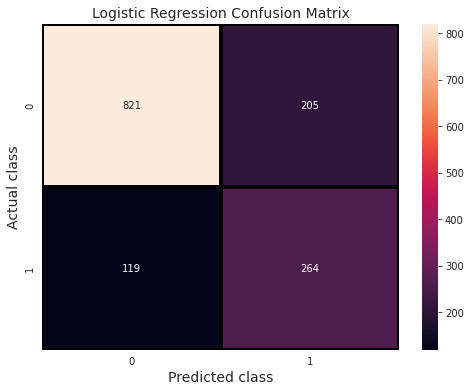

In [65]:
# how accurate our model is

def Heatmap(feature,prediction):
  plt.figure(figsize=(8,6))
  sns.heatmap(confusion_matrix(y_test, prediction),annot=True,fmt = "d",linecolor="k",linewidths=3)
  plt.title(f"{feature}",fontsize=14)
  plt.ylabel('Actual class',fontsize=14)
  plt.xlabel('Predicted class',fontsize=14)
  plt.show()

Heatmap('Logistic Regression Confusion Matrix',pred)


### Insights:

* The accuracy score of Logistic Regression after resampling the dataset was found to be 77% and the model was able to predict 264 churners out of 383.

* The Precision is found to be 0.56, the Recall is 0.69 and the F1 score is 0.62.

### 2. Decision Tree

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE()
x_train_smote,y_train_smote=SMOTE.fit_resample(x_train,y_train)

In [67]:
# Running decision tree model
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
# Making prediction
dt_pred=model.predict(x_test)
dt_pred

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [69]:
# printing accuracy score
print(f'Decision Tree acuuracy score : {accuracy_score(y_test,dt_pred)}')

Decision Tree acuuracy score : 0.7700496806245565


In [70]:
# Creating classification report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

          No       0.87      0.80      0.84      1026
         Yes       0.56      0.69      0.62       383

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



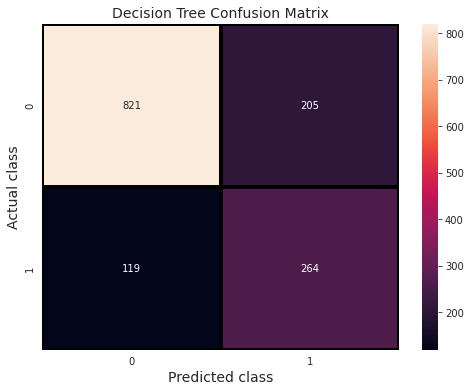

In [71]:
# Plotting confusion matrix
Heatmap('Decision Tree Confusion Matrix',dt_pred)

### Insights:

* The accuracy score of Decision Tree after resampling the dataset was found to be 77% and the model was able to predict 264 churners out of 383.

* The Precision is found to be 0.56, the Recall is 0.69 and the F1 score is 0.62.






### 3. K- Nearest Neighbours

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE()
x_train_smote,y_train_smote=SMOTE.fit_resample(x_train,y_train)

In [73]:
# Running KNN model
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(x_train_smote,y_train_smote)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [74]:
# Making Prediction
knn_pred = knn_model.predict(x_test)

In [75]:
# Finding accuracy 
print(f'KNN accuracy score is : {accuracy_score(y_test,knn_pred)}')

KNN accuracy score is : 0.6231369765791341


In [76]:
# Build a text report showing the main classification metrics
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

          No       0.93      0.52      0.67      1026
         Yes       0.41      0.89      0.56       383

    accuracy                           0.62      1409
   macro avg       0.67      0.71      0.62      1409
weighted avg       0.79      0.62      0.64      1409



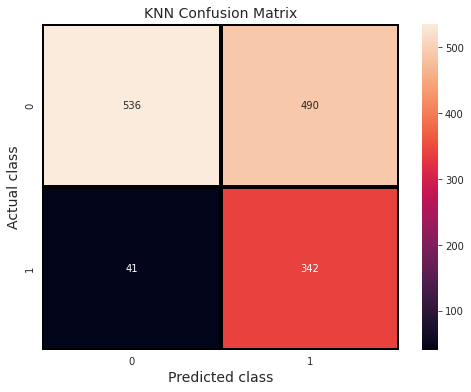

In [77]:
Heatmap('KNN Confusion Matrix',knn_pred)

### Insights:

* KNN model got an accuracy of only 62%.

* The Precision is found to be 0.41, the Recall is 0.89 and the F1 score is only 0.56.

* Also the Type 2 error is very high.

## **Conclusion**

After performing the analysis and applying different Machine Learning Algorithms, we can say that out of the three models, decision tree and logistic regression were more accurate in predicting the values and we were able to get an accuracy of 77%.